# YouTube Comment Spam Detection
DSP Project  
Date: 2023-11-04  
Author: Albert Zihan Zeng

## Introduction

**Overview**: The proliferation of online platforms, especially social media and video-sharing websites like YouTube, has brought forth the challenge of dealing with spam. YouTube, being one of the largest video-sharing platforms, relies heavily on user engagement through comments. However, this engagement feature is often exploited by spammers to spread malicious content, irrelevant links, or disruptive messages.

**Problem Statement**: The YouTube Comment Spam Detection Project addresses this issue by implementing machine learning and natural language processing (NLP) techniques to automatically identify and filter out spam comments. The primary goal of this project is to enhance user experience, maintain a healthy commenting environment, and ensure that viewers and creators can engage in meaningful conversations without being disturbed by spammy or harmful content.

**Objectives**:

1. Develop a machine learning model that correctly sorts YouTube comment into spam or ham (legitimate) groups.
2. Make sure the model can keep up with the changing nature of spam messages to keep its accuracy high over time.
3. Lowering the chance of wrongly labeling comments, to ensure that less legitimate comments are wrongly marked as spam.
4. Test different algorithms to find the best one for this job.
5. Help ongoing research in spam detection by offering a strong and scalable solution that could be used for other forms of digital communication too.

The YouTube Comment Spam Detection Project not only contributes to a more enjoyable user experience but also plays a crucial role in maintaining the integrity and authenticity of interactions within the YouTube community. Through the implementation of advanced technologies, this project stands at the forefront of combating spam and fostering genuine connections among users.

### Hypothesis

These are some of the hypotheses we will test by exploring the data.

- Comments which are labeled as spam mostly have a positive sentiment
- There are less spam comments generated in weekends
- There are less spam comments generated at night times
- Positive sentiment comments have more likes and replies
- Spam comments are more likely to have longer comment length
- There is a linear positive relationship between Likes and Reply Count
- Duplicated comment post within the same day are highly likely to be spam

## Data Source

The dataset used in this project consists 5000 comments consisting 2500 of each spam and not spam comments gathered from various YouTube videos. The data includes various features about the comment besides the comment body:

|**Column**|**Description**|
|:--|:--|
|**Name**| The user name who posted the comment.  |
|**Comment**| The comment text.  |
|**Time**| Containing both date and time info of the comment post.  |
|**Likes**| Number of Likes received for this comment.  |
|**Reply Count**| Number of replies received for this comment.  |
|**Spam**| Comment labeled as Spam (1) or Ham (0).|

The original dataset was downloaded from:  
https://www.kaggle.com/datasets/madhuragl/5000-youtube-spamnot-spam-dataset

### Data Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from time import time

In [2]:
df0 = pd.read_csv("5000 YT comments.csv", encoding='latin1')
df0.shape

(5000, 6)

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         5000 non-null   object
 1   Comment      5000 non-null   object
 2   Time         5000 non-null   object
 3   Likes        5000 non-null   int64 
 4   Reply Count  5000 non-null   int64 
 5   Spam         5000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 234.5+ KB


In [4]:
df0.head(10)

,Name,Comment,Time,Likes,Reply Count,Spam
0,Taofeekat,&lt;????i make my first million investing in f...,2022-09-28T02:08:55Z,30,30,1
1,Angelina Jordan,&lt;?l will forever be indebted to you I will ...,2022-09-23T05:26:48Z,0,0,1
2,Fernandez Joe,<b>????I recommend a professional forex/Bitcoi...,2022-09-20T12:56:30Z,5,2,1
3,Jessica Billy,I think Im blessed because if not I wouldnt ...,2022-09-17T20:20:24Z,21,34,1
4,Allison Zar,<b>I recommend a professional broker to you g...,2022-09-05T09:19:30Z,19,27,1
5,Williams Adam,MRS EVELYN IS LEGIT AND HER METHOD WORKS LIKE ...,2022-08-31T19:30:53Z,32,30,1
6,duke claire,?i recommend a professional broker to you guys...,2022-08-28T19:26:12Z,2,37,1
7,Visit Platform ??LYNNHACK??telegram,<b>You improved????my trading alot that my $80...,2022-08-17T22:38:09Z,0,0,1
8,Visit Platform ??LYNNHACK??telegram,<b>You improved????my trading alot that my $80...,2022-08-17T22:38:05Z,0,0,1
9,Jennifer Kyle,<b>I recommend a professional broker to you gu...,2022-08-16T23:13:10Z,3,30,1


In [5]:
df0[['Likes','Reply Count']].describe().T

,count,mean,std,min,25%,50%,75%,max
Likes,5000.0,27.0188,317.279457,0.0,0.0,0.0,2.0,14581.0
Reply Count,5000.0,3.4146,10.345014,0.0,0.0,0.0,1.0,106.0


In [6]:
df0.Spam.value_counts()

1    2500
0    2500
Name: Spam, dtype: int64

In [7]:
df0.isnull().sum().sum()

0

In [8]:
df0.duplicated().sum()

0

## Data Preprocessing

In [9]:
df = df0.copy()
df.shape

(5000, 6)

### Text Cleaning

In [10]:
### function regex cleaning
def regex_clean(text):
    text = re.sub('\<\/{0,1}[a-z][^>]*\>', '', text)    # remove html tags <a*> and </a>
    text = text.lower()
    text = re.sub('\d+[\d\,\.\:\/\%km]*', ' NUMBER ', text)    # replace digits with NUMBER
    text = re.sub('\$\s*NUMBER', 'DOLLAR', text)    # replace $ with DOLLAR
    text = re.sub('\x92', "'", text)    # replace  with '
    text = re.sub('[^\w\']+', ' ', text)    # remove non-alphanumerics
    return text

### function to clean text
def clean_text(col):
    ### read html symbols
    from html import unescape
    col = col.map(lambda x: unescape(x))

    ### regex cleaning
    col = col.map(lambda x: regex_clean(x))
    return col

In [11]:
df.Name = clean_text(df.Name)
df.Comment = clean_text(df.Comment)
df.head(10)

,Name,Comment,Time,Likes,Reply Count,Spam
0,taofeekat,i make my first million investing in forex tr...,2022-09-28T02:08:55Z,30,30,1
1,angelina jordan,l will forever be indebted to you i will cont...,2022-09-23T05:26:48Z,0,0,1
2,fernandez joe,i recommend a professional forex bitcoin brok...,2022-09-20T12:56:30Z,5,2,1
3,jessica billy,i think i'm blessed because if not i wouldn't ...,2022-09-17T20:20:24Z,21,34,1
4,allison zar,i recommend a professional broker to you guys ...,2022-09-05T09:19:30Z,19,27,1
5,williams adam,mrs evelyn is legit and her method works like ...,2022-08-31T19:30:53Z,32,30,1
6,duke claire,i recommend a professional broker to you guys...,2022-08-28T19:26:12Z,2,37,1
7,visit platform lynnhack telegram,you improved my trading alot that my DOLLAR lo...,2022-08-17T22:38:09Z,0,0,1
8,visit platform lynnhack telegram,you improved my trading alot that my DOLLAR lo...,2022-08-17T22:38:05Z,0,0,1
9,jennifer kyle,i recommend a professional broker to you guys ...,2022-08-16T23:13:10Z,3,30,1


In [12]:
### merge Name and Comment columns
df['Text'] = df['Name'] + ' ' + df['Comment']
df['Text'][:5]

0    taofeekat  i make my first million investing i...
1    angelina jordan  l will forever be indebted to...
2    fernandez joe  i recommend a professional fore...
3    jessica billy i think i'm blessed because if n...
4    allison zar i recommend a professional broker ...
Name: Text, dtype: object

In [13]:
### removing stopwords and lemmatize
def process_text(text):
    from nltk.tokenize import TreebankWordTokenizer
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    
    tokenizer = TreebankWordTokenizer()
    stop_words = stopwords.words("english")
    lemmatizer = WordNetLemmatizer()
    
    tokens = tokenizer.tokenize(text)
    filtered_tokens = [w for w in tokens if w not in stop_words]
    filtered = [lemmatizer.lemmatize(w) for w in filtered_tokens]
    filtered_text = ' '.join(filtered)
    return filtered_text
df['Text'] = df['Text'].apply(process_text)
df['Text'][:5]

0    taofeekat make first million investing forex t...
1    angelina jordan l forever indebted continue pr...
2    fernandez joe recommend professional forex bit...
3    jessica billy think 'm blessed would n't met s...
4    allison zar recommend professional broker guy ...
Name: Text, dtype: object

### Feature Engineering

In [14]:
df1 = df.drop(columns='Text').copy()
df1.head()

,Name,Comment,Time,Likes,Reply Count,Spam
0,taofeekat,i make my first million investing in forex tr...,2022-09-28T02:08:55Z,30,30,1
1,angelina jordan,l will forever be indebted to you i will cont...,2022-09-23T05:26:48Z,0,0,1
2,fernandez joe,i recommend a professional forex bitcoin brok...,2022-09-20T12:56:30Z,5,2,1
3,jessica billy,i think i'm blessed because if not i wouldn't ...,2022-09-17T20:20:24Z,21,34,1
4,allison zar,i recommend a professional broker to you guys ...,2022-09-05T09:19:30Z,19,27,1


In [15]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zihan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
### sentiment analysis
def get_sentiment(text):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05: sentiment = 1
    elif scores['compound'] <= 0.05: sentiment = -1
    else: sentiment = 0
    return sentiment

In [17]:
df1['Sentiment'] = df1['Comment'].apply(get_sentiment)
df1.tail()

,Name,Comment,Time,Likes,Reply Count,Spam,Sentiment
4995,anjan das,she is so beautiful,2020-06-05T04:18:26Z,5,0,0,1
4996,humza navaid,NUMBER seconds in and i want to marry her i a...,2020-06-04T21:03:14Z,0,0,0,1
4997,aadil ranesh,she talks a lot like tanmay bakshi,2020-06-03T17:29:04Z,0,0,0,1
4998,fuzail ahmad,why does her face look like a bad deepfake,2020-06-03T11:17:48Z,1,0,0,-1
4999,kcmn NUMBER,so will bankers lose their jobs,2020-06-03T08:11:15Z,0,0,0,-1


In [18]:
df1.Sentiment.value_counts()

 1    3484
-1    1516
Name: Sentiment, dtype: int64

In [19]:
### comment length
df1['CommentLength'] = df1['Comment'].map(lambda x: len(x))
df1.head(3)

,Name,Comment,Time,Likes,Reply Count,Spam,Sentiment,CommentLength
0,taofeekat,i make my first million investing in forex tr...,2022-09-28T02:08:55Z,30,30,1,1,164
1,angelina jordan,l will forever be indebted to you i will cont...,2022-09-23T05:26:48Z,0,0,1,1,215
2,fernandez joe,i recommend a professional forex bitcoin brok...,2022-09-20T12:56:30Z,5,2,1,1,126


In [20]:
### log transformation
df1['Likes'] = df1['Likes'].map(lambda x: np.log(x+1))
df1['Reply Count'] = df1['Reply Count'].map(lambda x: np.log(x+1))

In [21]:
### converting datetime
df1['Datetime'] = df1.Time.map(lambda x: re.sub('Z', '', re.sub('T', ' ', x)))
df1.Datetime = pd.DatetimeIndex(df1.Datetime)
df1.Datetime[:1]

0   2022-09-28 02:08:55
Name: Datetime, dtype: datetime64[ns]

In [22]:
df1['Date'] = df1.Datetime.dt.date
df1['Year'] = df1.Datetime.dt.year
df1['Month'] = df1.Datetime.dt.month
df1['Day'] = df1.Datetime.dt.day
df1['DayofYear'] = df1.Datetime.dt.dayofyear
df1['Hour'] = df1.Datetime.dt.hour
df1['DayofWeek'] = df1.Datetime.dt.dayofweek +1
df1['IsWeekend'] = df1.DayofWeek // 6    # 6&7 is Sat&Sun
df1['Period'] = df1['Date'].map(lambda x: re.search('.{7}',str(x)).group())

In [23]:
### part of day
def get_daypart(x):
    if ((x>=2) & (x<9)): daypart = 0    # 0 = morning
    elif ((x>=9) & (x<18)): daypart = 1    # 1 = daytime
    else: daypart = 2    # 2 = night
    return daypart
df1['DayPart'] = df1.Hour.map(lambda x: get_daypart(x))
df1.DayPart.value_counts()

1    1943
2    1911
0    1146
Name: DayPart, dtype: int64

In [24]:
df1[['Comment','Date']].duplicated().sum()

169

In [25]:
# duplicated comment of the same day
df1['DuplicatePost'] = 0
df1.loc[df1[['Comment','Date']].duplicated(),'DuplicatePost'] = 1
df1.DuplicatePost.value_counts()

0    4831
1     169
Name: DuplicatePost, dtype: int64

In [26]:
df1.drop(columns=['Name','Datetime','Comment']).head(3)

,Time,Likes,Reply Count,Spam,Sentiment,CommentLength,Date,Year,Month,Day,DayofYear,Hour,DayofWeek,IsWeekend,Period,DayPart,DuplicatePost
0,2022-09-28T02:08:55Z,3.433987,3.433987,1,1,164,2022-09-28,2022,9,28,271,2,3,0,2022-09,0,0
1,2022-09-23T05:26:48Z,0.000000,0.000000,1,1,215,2022-09-23,2022,9,23,266,5,5,0,2022-09,0,0
2,2022-09-20T12:56:30Z,1.791759,1.098612,1,1,126,2022-09-20,2022,9,20,263,12,2,0,2022-09,1,0


### Outliers

In [27]:
df2 = df1.drop(columns=['Name','Comment','Time','Datetime']).copy()
df2.Likes = np.exp(df2.Likes)-1
df2['Reply Count'] = np.exp(df2['Reply Count'])-1
df2.shape

(5000, 16)

In [28]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Likes,5000.0,27.0188,317.279457,0.0,0.0,0.0,2.0,14581.0
Reply Count,5000.0,3.4146,10.345014,0.0,0.0,0.0,1.0,106.0
Spam,5000.0,0.5000,0.500050,0.0,0.0,0.5,1.0,1.0
Sentiment,5000.0,0.3936,0.919374,-1.0,-1.0,1.0,1.0,1.0
CommentLength,5000.0,185.9798,253.514775,0.0,51.0,110.0,208.0,4282.0
Year,5000.0,2021.0292,0.855391,2017.0,2021.0,2021.0,2022.0,2022.0
Month,5000.0,6.1580,3.336714,1.0,3.0,6.0,9.0,12.0
Day,5000.0,15.5244,8.620920,1.0,8.0,16.0,23.0,31.0
DayofYear,5000.0,171.7658,101.622212,1.0,88.0,157.0,257.0,366.0
Hour,5000.0,12.1672,7.072655,0.0,6.0,13.0,18.0,23.0


In [29]:
df2[['Likes','CommentLength']].quantile([0,.25,.5,.75,.95,.99,.999,1]).T

,0.000,0.250,0.500,0.750,0.950,0.990,0.999,1.000
Likes,0.0,0.0,0.0,2.0,51.00,443.0,4663.786,14581.0
CommentLength,0.0,51.0,110.0,208.0,652.25,1150.0,2594.100,4282.0


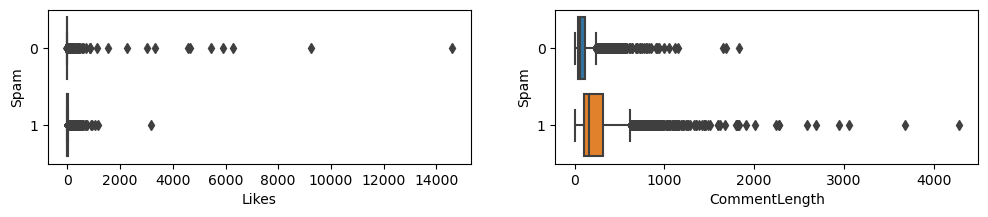

In [30]:
plt.figure(figsize=(12,2))
plt.subplot(1,2,1)
sns.boxplot(data=df2, x='Likes', y='Spam', orient='h')
plt.subplot(1,2,2)
sns.boxplot(data=df2, x='CommentLength', y='Spam', orient='h')
plt.show()

In [31]:
### dropping extreme outliers > 2000
df2.drop(index=df2.loc[df2['Likes']>2000].index, inplace=True)
### dropping extreme outliers > .99 quantile and < 2
df2.drop(index=df2.loc[df2['CommentLength']>df2['CommentLength'].quantile(.99)].index, inplace=True)
df2.drop(index=df2.loc[df2['CommentLength']<2].index, inplace=True)
df2.shape

(4914, 16)

In [32]:
### dropping comment outliers in df
df.drop(index=df1.loc[df1['CommentLength']>df1['CommentLength'].quantile(.99)].index, inplace=True)
df.drop(index=df1.loc[df1['CommentLength']<2].index, inplace=True)
df.shape

(4925, 7)

### Missing Values

*(For method illustration only, missing values are made up first then handled.)*

In [33]:
### removing 50 random values
import random
random.seed(43)
index_seed = [random.randint(0,5000) for i in range(100)]
df2.loc[index_seed[:50], 'Likes'] = np.NaN
df2.loc[index_seed[50:100], 'CommentLength'] = np.NaN

For Likes feature, mode will be used to fill the null values because the mode consists 63% of the data.

In [34]:
df2['Likes'].value_counts(normalize=True)

0.0      0.623355
1.0      0.126028
2.0      0.033923
3.0      0.019942
4.0      0.015008
           ...   
203.0    0.000206
400.0    0.000206
182.0    0.000206
213.0    0.000206
163.0    0.000206
Name: Likes, Length: 212, dtype: float64

In [35]:
df2.Likes.isnull().sum()

50

In [36]:
### filling nulls with mode
Likes_mode = df2['Likes'].mode()[0]
df2['Likes'] = df2['Likes'].fillna(Likes_mode)
df2['Likes'].isnull().sum()

0

For CommentLength feature, we have no way to infer the missing values from other features, so these rows will be dropped.

In [37]:
df2.drop(index=df2.loc[df2.CommentLength.isnull()].index, inplace=True)
df2.shape

(4864, 16)

## Exploratory Analysis

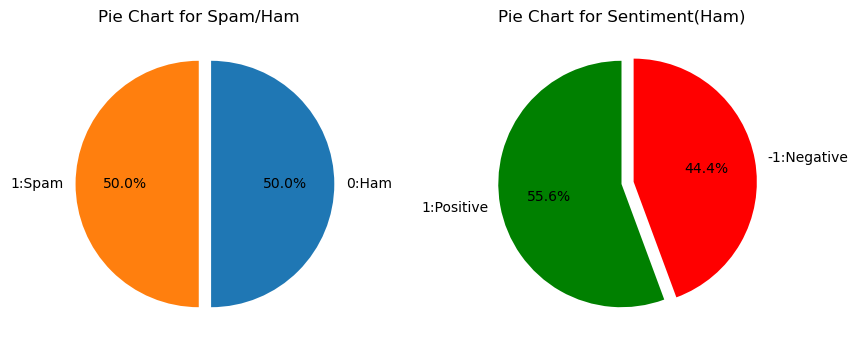

In [38]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.pie(df1['Spam'].value_counts(), labels=['1:Spam','0:Ham'],
        startangle=90, explode=[0,.1], autopct='%1.1f%%', colors=['#ff7f0e','#1f77b4'])
plt.title("Pie Chart for Spam/Ham")
plt.subplot(1,2,2)
plt.pie(df1.loc[df1.Spam==0,'Sentiment'].value_counts(), labels=['1:Positive','-1:Negative'],
        startangle=90, explode=[0,.1], autopct='%1.1f%%', colors=['green','red'])
plt.title("Pie Chart for Sentiment(Ham)")
plt.show()

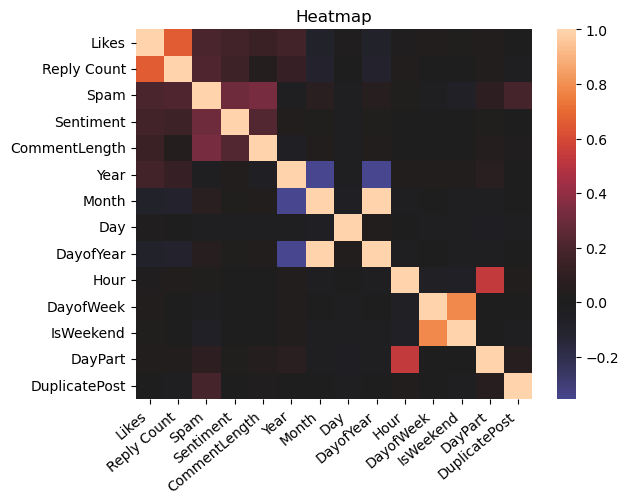

In [39]:
# heatmap
sns.heatmap(df1.select_dtypes(['float','int']).corr(), center=0)
plt.xticks(rotation=40, ha='right')
plt.title("Heatmap")
plt.show()

In [40]:
pd.crosstab(df1.Sentiment.replace({1:"Positive",-1:"Negative"}),\
            df1.Spam.replace({0:"Ham",1:"Spam"}))

Spam,Ham,Spam
Sentiment,,
Negative,1109,407
Positive,1391,2093


In [41]:
pd.crosstab(df1.DuplicatePost.replace({1:"Yes",0:"No"}),\
            df1.Spam.replace({0:"Ham",1:"Spam"}))

Spam,Ham,Spam
DuplicatePost,,
No,2497,2334
Yes,3,166


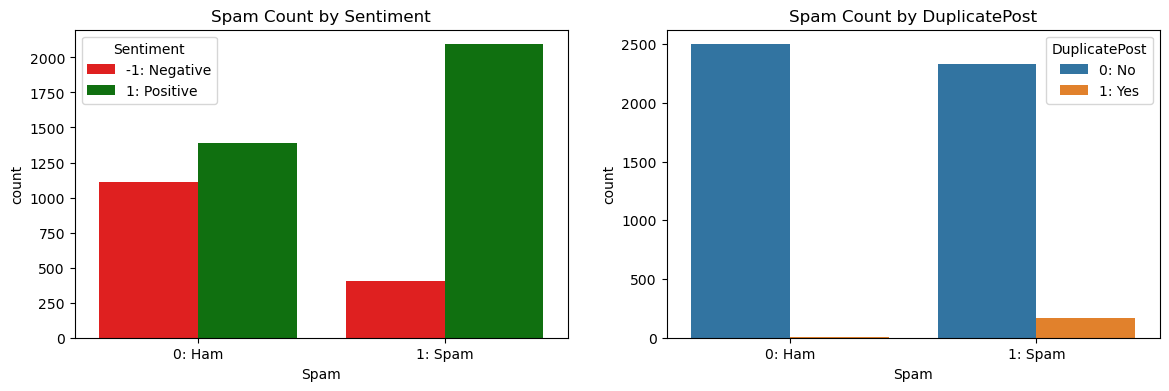

In [42]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.countplot(data=df1, x='Spam', hue='Sentiment', palette=['red','green'])
plt.xticks(ticks=[0,1], labels=["0: Ham","1: Spam"])
plt.legend(["-1: Negative", "1: Positive"], title="Sentiment")
plt.title("Spam Count by Sentiment")
plt.subplot(1,2,2)
sns.countplot(data=df1, x='Spam', hue='DuplicatePost', palette=['#1f77b4','#ff7f0e'])
plt.xticks(ticks=[0,1], labels=["0: Ham","1: Spam"])
plt.legend(["0: No", "1: Yes"], title="DuplicatePost")
plt.title("Spam Count by DuplicatePost")
plt.show()

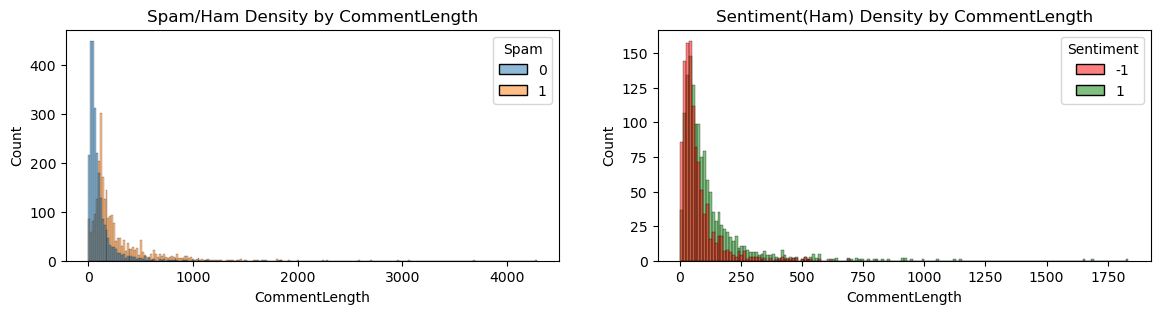

In [43]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.histplot(data=df1, x='CommentLength', hue='Spam', palette=['#1f77b4','#ff7f0e'])
plt.title("Spam/Ham Density by CommentLength")
plt.subplot(1,2,2)
sns.histplot(data=df1[df1.Spam==0], x='CommentLength', hue='Sentiment', palette=['red','green'])
plt.title("Sentiment(Ham) Density by CommentLength")
plt.show()

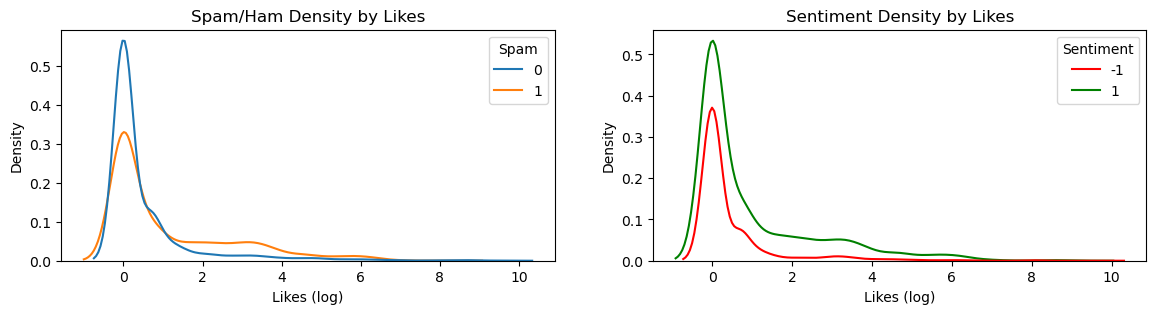

In [44]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.kdeplot(data=df1, x='Likes', hue='Spam', palette=['#1f77b4','#ff7f0e'])
plt.title("Spam/Ham Density by Likes")
plt.xlabel("Likes (log)")
plt.subplot(1,2,2)
sns.kdeplot(data=df1, x='Likes', hue='Sentiment', palette=['red','green'])
plt.title("Sentiment Density by Likes")
plt.xlabel("Likes (log)")
plt.show()

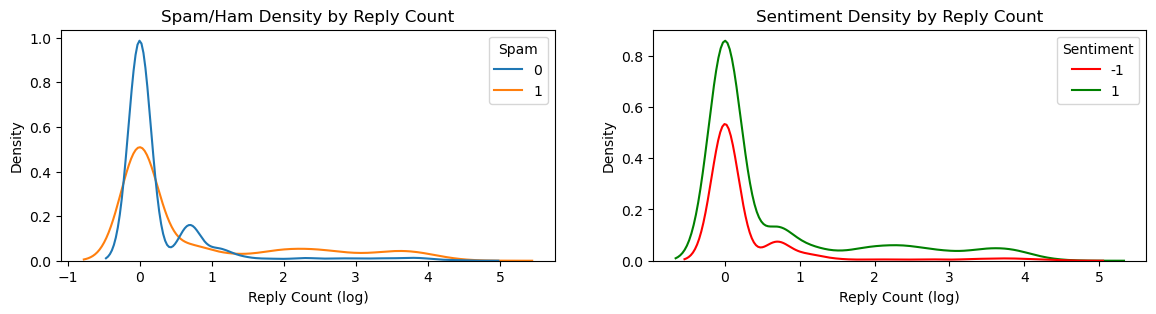

In [45]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.kdeplot(data=df1, x='Reply Count', hue='Spam', palette=['#1f77b4','#ff7f0e'])
plt.title("Spam/Ham Density by Reply Count")
plt.xlabel("Reply Count (log)")
plt.subplot(1,2,2)
sns.kdeplot(data=df1, x='Reply Count', hue='Sentiment', palette=['red','green'])
plt.title("Sentiment Density by Reply Count")
plt.xlabel("Reply Count (log)")
plt.show()

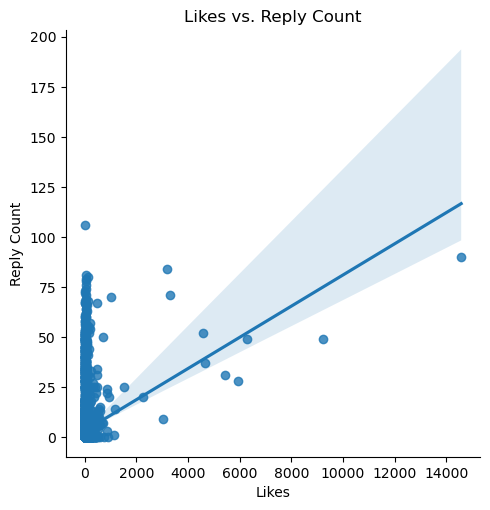

In [46]:
sns.lmplot(data=df, x='Likes', y='Reply Count')
plt.title("Likes vs. Reply Count")
plt.show()

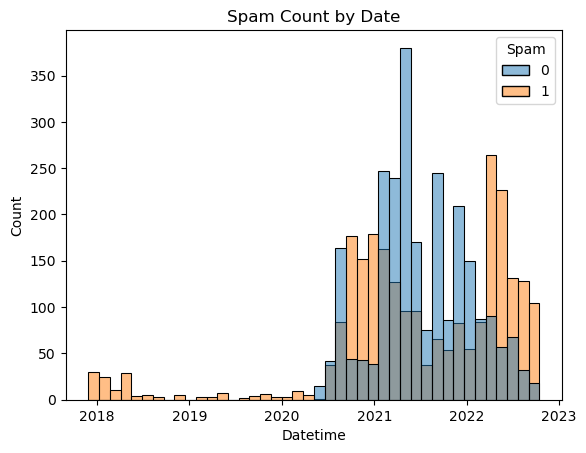

In [47]:
plt.title("Spam Count by Date")
sns.histplot(data=df1, x='Datetime', hue='Spam')
plt.show()

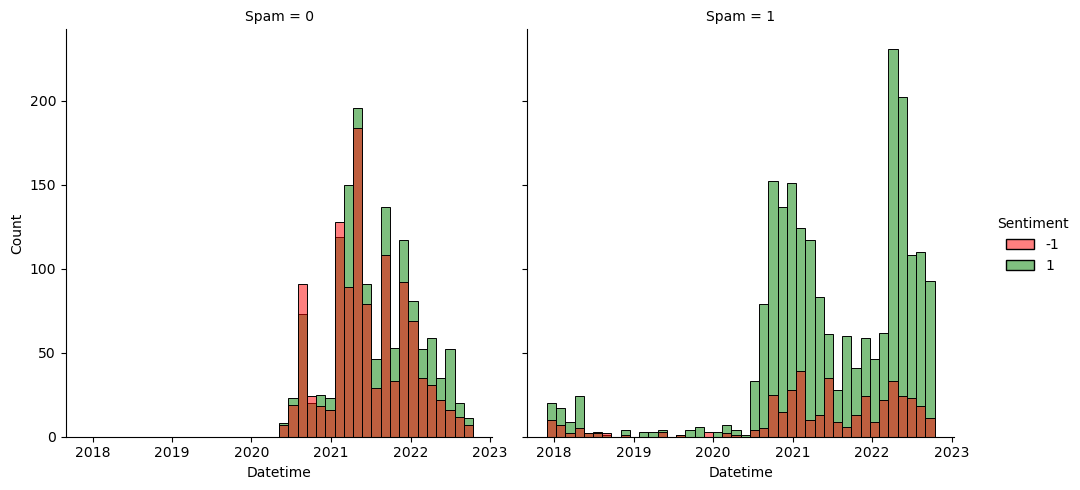

In [48]:
sns.displot(data=df1, x='Datetime', hue='Sentiment', col='Spam', palette=['red','green'])
plt.show()

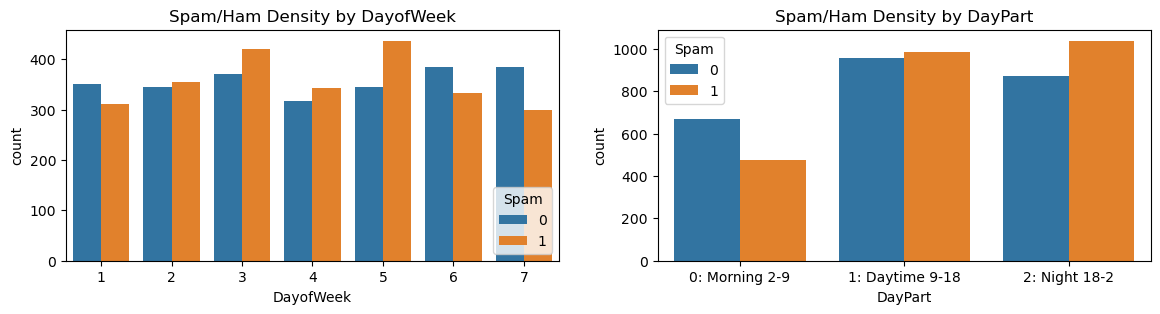

In [49]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.countplot(data=df1, x='DayofWeek', hue='Spam')
plt.title("Spam/Ham Density by DayofWeek")
plt.legend(loc='lower right', title="Spam")
plt.subplot(1,2,2)
sns.countplot(data=df1, x='DayPart', hue='Spam')
plt.title("Spam/Ham Density by DayPart")
plt.xticks(ticks=[0,1,2], labels=["0: Morning 2-9","1: Daytime 9-18","2: Night 18-2"])
plt.show()

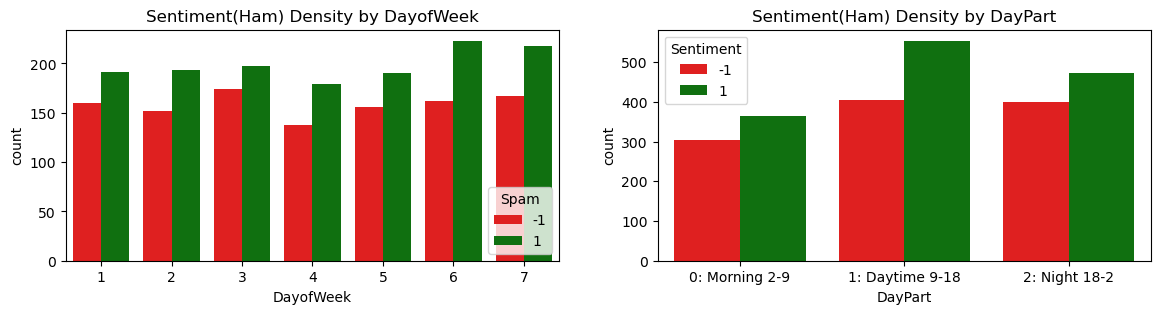

In [50]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.countplot(data=df1[df1.Spam==0], x='DayofWeek', hue='Sentiment', palette=['red','green'])
plt.title("Sentiment(Ham) Density by DayofWeek")
plt.legend(loc='lower right', title="Spam")
plt.subplot(1,2,2)
sns.countplot(data=df1[df1.Spam==0], x='DayPart', hue='Sentiment', palette=['red','green'])
plt.title("Sentiment(Ham) Density by DayPart")
plt.xticks(ticks=[0,1,2], labels=["0: Morning 2-9","1: Daytime 9-18","2: Night 18-2"])
plt.show()

In [51]:
### test for same median, countinuous variables against Spam
def MannWhitneyU(df, grp, alpha=.05):
    from scipy.stats import mannwhitneyu
    res = []
    for col in df:
        p_val = mannwhitneyu(df[col][grp==0],df[col][grp==1])[1]
        if p_val < alpha: corr="Different"
        else: corr="Same"
        entry = {'Var1':col, 'Var2':grp.name, 'Median':corr, 'alpha':alpha, 'p_val':p_val}
        res.append(entry)
    return pd.DataFrame(res)
MannWhitneyU(df1[['Likes','Reply Count','CommentLength']], df1['Spam'])

,Var1,Var2,Median,alpha,p_val
0,Likes,Spam,Different,0.05,3.794234e-48
1,Reply Count,Spam,Different,0.05,8.106920e-30
2,CommentLength,Spam,Different,0.05,6.835812e-263


In [52]:
### test for independence, catagorical variables against Spam
def chi_square(c1, c2, alpha=.05):
    from scipy.stats import chi2_contingency
    res = []
    for col in c1:
        crosstab = np.array(pd.crosstab(c1[col], c2, margins = False))
        chi_sq, p_val, *a = chi2_contingency(crosstab)
        cram_V = np.sqrt(chi_sq/ (np.sum(crosstab)*(min(crosstab.shape)-1)))
        if p_val < alpha: corr="Yes"
        else: corr="No"
        entry = {'Var1':col, 'Var2':c2.name, 'Correlated':corr, 'alpha':alpha, 'p_val':round(p_val,3), "Cramer's V":round(cram_V,3)}
        res.append(entry)
    return pd.DataFrame(res)
chi_square(df1[['Sentiment','Year','DayofWeek','IsWeekend','DayPart']], df1['Spam'])

,Var1,Var2,Correlated,alpha,p_val,Cramer's V
0,Sentiment,Spam,Yes,0.05,0.0,0.305
1,Year,Spam,Yes,0.05,0.0,0.374
2,DayofWeek,Spam,Yes,0.05,0.0,0.080
3,IsWeekend,Spam,Yes,0.05,0.0,0.061
4,DayPart,Spam,Yes,0.05,0.0,0.097


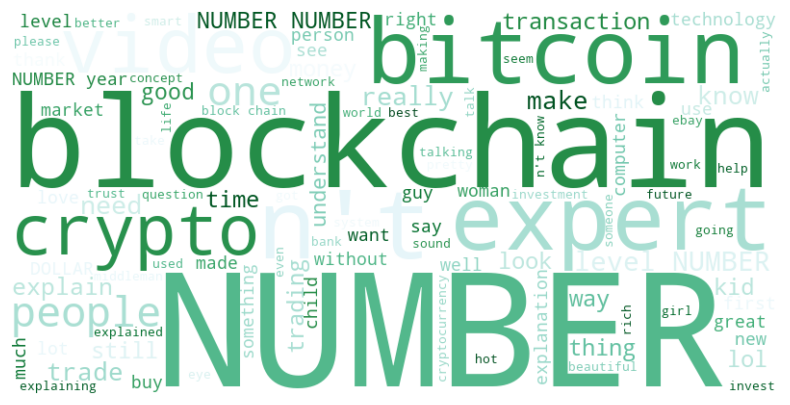

In [53]:
### wordcloud for Ham
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=100, min_word_length=3, background_color='white', colormap='BuGn')
wordcloud.generate(' '.join(df.loc[df.Spam==0,'Text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

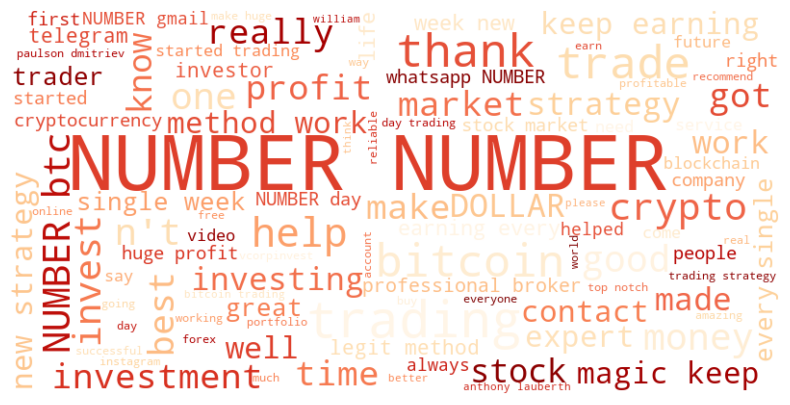

In [54]:
### wordcloud for Spam
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=100, min_word_length=3, background_color='white', colormap='OrRd')
wordcloud.generate(' '.join(df.loc[df.Spam==1,'Text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Models

Two approaches for spam prediction will be tested.

- Approach A: prediction models will be built based on NLP (natural language processing) application on the name and comment text.
- Approach B: prediction models will be built based on related attributes of the comment posts.

### Approach A: NLP

#### Preparation

In [55]:
### split train test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Text, df.Spam, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3940,) (985,) (3940,) (985,)


In [56]:
### vectorizing text into sparse matrix
from sklearn.feature_extraction.text import TfidfVectorizer
trans_vect = TfidfVectorizer(min_df=3)
X_train = trans_vect.fit_transform(X_train)
X_test = trans_vect.transform(X_test)

In [57]:
X_train

<3940x3035 sparse matrix of type '<class 'numpy.float64'>'
	with 55413 stored elements in Compressed Sparse Row format>

In [58]:
X_test

<985x3035 sparse matrix of type '<class 'numpy.float64'>'
	with 14422 stored elements in Compressed Sparse Row format>

In [59]:
def model_evaluate(name, model, X_train, y_train, X_test, y_test):
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
    from sklearn.metrics import classification_report, confusion_matrix
    
    t1 = time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    t2 = time()

    crossval = cross_val_score(model, X_train, y_train, cv=4, n_jobs=-1)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    entry = {'CrossVal':crossval.mean(), 'Accuracy':accuracy, 'F1 Score':f1, 'ROC-AUC':auc, 'Time':t2-t1}
    return pd.DataFrame(entry, index=[name]), report, confusion

#### Naive Bayes Classifier

In [60]:
from sklearn.naive_bayes import MultinomialNB
nbc = MultinomialNB()
Result_NBC = model_evaluate("A1. Naive Bayes", nbc, X_train, y_train, X_test, y_test)
Result_NBC[0].round(4)

,CrossVal,Accuracy,F1 Score,ROC-AUC,Time
A1. Naive Bayes,0.8921,0.9005,0.9001,0.8992,0.003


#### Logistic Regression

In [61]:
### solver + penalty + C + class_weight
from sklearn.linear_model import LogisticRegression
param1 = ['lbfgs','liblinear','liblinear']
param2 = ['l2','l1','l2']
param3 = [1,5,8]
Result = pd.DataFrame([])
for p1,p2 in zip(param1,param2):
    for p3 in param3:
        lrm = LogisticRegression(solver=p1, penalty=p2, C=p3)
        res = model_evaluate(f"{p1} + {p2} + {p3}", lrm, X_train, y_train, X_test, y_test)[0]
        Result = pd.concat([Result,res],axis=0)
Result.sort_values(['Accuracy','CrossVal'], ascending=False)[:5]

,CrossVal,Accuracy,F1 Score,ROC-AUC,Time
lbfgs + l2 + 8,0.905584,0.904569,0.904480,0.903991,0.049017
liblinear + l2 + 8,0.905330,0.904569,0.904480,0.903991,0.008968
lbfgs + l2 + 1,0.900000,0.903553,0.903523,0.903259,0.022892
liblinear + l2 + 1,0.899746,0.903553,0.903523,0.903259,0.005572
lbfgs + l2 + 5,0.908376,0.902538,0.902447,0.901960,0.047318


In [62]:
### best logistic regression
lrm = LogisticRegression(solver='liblinear', C=8)
Result_LR = model_evaluate("A2. Logistic Regression", lrm, X_train, y_train, X_test, y_test)
Result_LR[0].round(4)

,CrossVal,Accuracy,F1 Score,ROC-AUC,Time
A2. Logistic Regression,0.9053,0.9046,0.9045,0.904,0.0094


#### Support Vector Classifier

In [63]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param = {'kernel':['rbf','linear','sigmoid','poly'],
         'C':[1,5,8],
         'degree':[3,2,4],
         'random_state':[42]}
model = GridSearchCV(SVC(), param_grid=param, cv=4, n_jobs=-1)
model.fit(X_train, y_train)
print(model.best_params_, "\n")
svc = SVC(**model.best_params_)
Result_SVC = model_evaluate('A3. Support Vector Machine', svc, X_train, y_train, X_test, y_test)
Result_SVC[0].round(4)

{'C': 1, 'degree': 3, 'kernel': 'rbf', 'random_state': 42} 



,CrossVal,Accuracy,F1 Score,ROC-AUC,Time
A3. Support Vector Machine,0.9104,0.9117,0.9116,0.9114,1.2383


#### Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
scores = []
scores_test = []
for i in range(50,251,50):
    rfc = RandomForestClassifier(n_estimators=i, random_state=43, n_jobs=-1)
    rfc.fit(X_train, y_train)
    scores.append(cross_val_score(rfc,X_train,y_train,cv=4).mean())
    scores_test.append(rfc.fit(X_train, y_train).score(X_test, y_test))

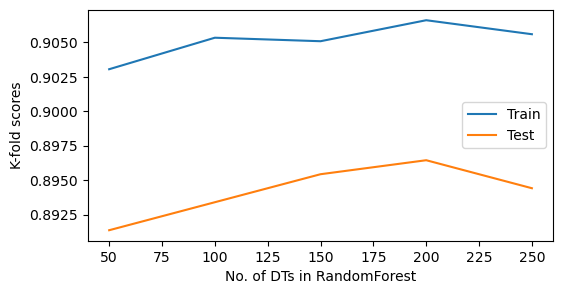

In [65]:
plt.figure(figsize=(6,3))
plt.plot(range(50,251,50),scores,label="Train")
plt.plot(range(50,251,50),scores_test,label="Test")
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.legend()
plt.show()

In [66]:
### criterion
param1 = ['gini','entropy','log_loss']
Result = pd.DataFrame([])
for p1 in param1:
    rfc = RandomForestClassifier(n_estimators=200, criterion=p1, random_state=43, n_jobs=-1)
    res = model_evaluate(f"{p1}", rfc, X_train, y_train, X_test, y_test)[0]
    Result = pd.concat([Result,res],axis=0)
Result.sort_values(['Accuracy','CrossVal'], ascending=False)

,CrossVal,Accuracy,F1 Score,ROC-AUC,Time
entropy,0.905076,0.897462,0.897430,0.897164,0.887415
log_loss,0.905076,0.897462,0.897430,0.897164,0.853975
gini,0.906599,0.896447,0.896377,0.895967,0.899649


In [67]:
### max_depth + max_features
param1 = [None,80,100,120]
param2 = ['sqrt',46,38,30]
Result = pd.DataFrame([])
for p1 in param1:
    for p2 in param2:
        rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=p1, max_features=p2, random_state=43, n_jobs=-1)
        res = model_evaluate(f"{p1} + {p2}", rfc, X_train, y_train, X_test, y_test)[0]
        Result = pd.concat([Result,res],axis=0)
Result.sort_values(['Accuracy','CrossVal'], ascending=False)[:5]

,CrossVal,Accuracy,F1 Score,ROC-AUC,Time
80 + sqrt,0.896954,0.902538,0.902554,0.902785,0.725298
100 + sqrt,0.898477,0.901523,0.901525,0.901485,0.761283
100 + 38,0.901523,0.899492,0.899506,0.899866,0.707373
120 + 46,0.901269,0.899492,0.899484,0.899350,0.733244
80 + 46,0.896447,0.899492,0.899508,0.899814,0.712595


In [68]:
### best random forest classifier
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=100, max_features=38, random_state=43, n_jobs=-1)
Result_RF = model_evaluate('A4. Random Forest', rfc, X_train, y_train, X_test, y_test)
Result_RF[0].round(4)

,CrossVal,Accuracy,F1 Score,ROC-AUC,Time
A4. Random Forest,0.9015,0.8995,0.8995,0.8999,0.7075


#### Extreme Gradient Boosting

In [69]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, n_jobs=-1)
Result_XGB = model_evaluate('A5. XG Boost', xgb, X_train, y_train, X_test, y_test)
Result_XGB[0].round(4)

,CrossVal,Accuracy,F1 Score,ROC-AUC,Time
A5. XG Boost,0.8995,0.8904,0.8904,0.8905,1.9413


### Approach B: Comment Attributes

#### Preparation

In [70]:
X1 = df1.drop(columns=['Name','Comment','Time','Datetime', 'Spam', 'Date', 'Period'])
X1.head(3)

,Likes,Reply Count,Sentiment,CommentLength,Year,Month,Day,DayofYear,Hour,DayofWeek,IsWeekend,DayPart,DuplicatePost
0,3.433987,3.433987,1,164,2022,9,28,271,2,3,0,0,0
1,0.000000,0.000000,1,215,2022,9,23,266,5,5,0,0,0
2,1.791759,1.098612,1,126,2022,9,20,263,12,2,0,1,0


In [71]:
### split train test sets
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, df1.Spam, test_size=0.2, random_state=42)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(4000, 13) (1000, 13) (4000,) (1000,)


In [72]:
### minmax scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_sc_train = sc.fit_transform(X_train1)
X_sc_test = sc.transform(X_test1)

#### Logistic Regression

In [73]:
### solver + penalty + C + class_weight
from sklearn.linear_model import LogisticRegression
param1 = ['lbfgs','liblinear','liblinear']
param2 = ['l2','l1','l2']
param3 = [1,5,8]
Result = pd.DataFrame([])
for p1,p2 in zip(param1,param2):
    for p3 in param3:
        model = LogisticRegression(solver=p1, penalty=p2, C=p3)
        res = model_evaluate(f"{p1} + {p2} + {p3}", model, X_sc_train, y_train1, X_sc_test, y_test1)[0]
        Result = pd.concat([Result,res],axis=0)
Result.sort_values(['Accuracy','CrossVal'], ascending=False)[:5]

,CrossVal,Accuracy,F1 Score,ROC-AUC,Time
liblinear + l1 + 1,0.74800,0.749,0.748063,0.749,0.038000
liblinear + l1 + 5,0.74825,0.748,0.746964,0.748,0.092139
liblinear + l1 + 8,0.74825,0.748,0.746964,0.748,0.023460
liblinear + l2 + 8,0.74400,0.745,0.744169,0.745,0.006997
lbfgs + l2 + 8,0.74375,0.745,0.744169,0.745,0.016998


In [74]:
### best logistic regression
lrm1 = LogisticRegression(solver='liblinear', penalty='l1', C=8)
Result_LR_B = model_evaluate("B1. Logistic Regression", lrm1, X_sc_train, y_train1, X_sc_test, y_test1)
Result_LR_B[0].round(4)

,CrossVal,Accuracy,F1 Score,ROC-AUC,Time
B1. Logistic Regression,0.7482,0.748,0.747,0.748,0.0866


#### Decision Tree

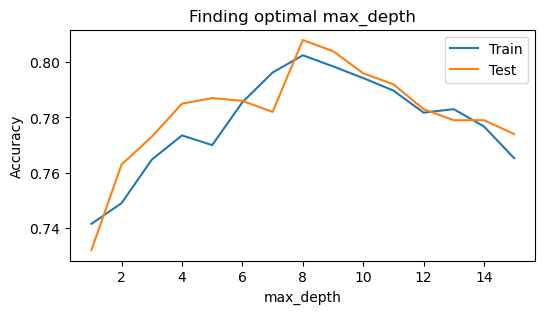

In [75]:
from sklearn.tree import DecisionTreeClassifier
scores = []
scores_test = []
for i in range(1,16,1):
    model = DecisionTreeClassifier(max_depth=i, random_state=42)
    scores.append(cross_val_score(model, X_train1, y_train1, cv=4).mean())
    scores_test.append(model.fit(X_train1, y_train1).score(X_test1, y_test1))
plt.figure(figsize=(6,3))
plt.plot(range(1,16,1), scores, label="Train")
plt.plot(range(1,16,1), scores_test, label="Test")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Finding optimal max_depth")
plt.legend()
plt.show()

In [76]:
# criterion + max_features
param1 = ['gini','entropy','log_loss']
param2 = ['sqrt',4,2]
param3 = [7,8,9]
Result = pd.DataFrame([])
for p1 in param1:
    for p2 in param2:
        for p3 in param3:
            model = DecisionTreeClassifier(criterion=p1, max_features=p2, max_depth=p3, random_state=42)
            res = model_evaluate(f"{p1} + {p2} + {p3}", model, X_train1, y_train1, X_test1, y_test1)[0]
            Result = pd.concat([Result,res],axis=0)
Result.sort_values(['Accuracy','CrossVal'], ascending=False)[:5]

,CrossVal,Accuracy,F1 Score,ROC-AUC,Time
gini + 4 + 8,0.78375,0.799,0.798694,0.799,0.004955
entropy + 4 + 8,0.78625,0.793,0.792746,0.793,0.005000
log_loss + 4 + 8,0.78625,0.793,0.792746,0.793,0.006000
gini + 4 + 9,0.78125,0.789,0.788572,0.789,0.006000
entropy + sqrt + 9,0.77300,0.784,0.783618,0.784,0.004319


In [77]:
# best decision tree classifier
dtc1 = DecisionTreeClassifier(max_features=4, max_depth=9, random_state=42)
Result_DT_B = model_evaluate('B2. Decision Tree', dtc1, X_train1, y_train1, X_test1, y_test1)
Result_DT_B[0].round(4)

,CrossVal,Accuracy,F1 Score,ROC-AUC,Time
B2. Decision Tree,0.7813,0.789,0.7886,0.789,0.007


#### Random Forest Classifier

In [78]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(random_state=42, n_jobs=-1)
Result_RF_B = model_evaluate('B3. Random Forest', rfc1, X_train1, y_train1, X_test1, y_test1)
Result_RF_B[0].round(4)

,CrossVal,Accuracy,F1 Score,ROC-AUC,Time
B3. Random Forest,0.8372,0.834,0.834,0.834,0.196


In [79]:
# feature importance
rfc1.fit(X_train1, y_train1)
feature_importances = pd.DataFrame({'Importance': rfc1.feature_importances_}, index=X1.columns)
feature_importances = feature_importances.sort_values('Importance', ascending=False)
feature_importances

,Importance
CommentLength,0.296972
DayofYear,0.119585
Year,0.104829
Day,0.083401
Hour,0.075066
Likes,0.062005
Month,0.058333
Reply Count,0.053701
Sentiment,0.047829
DayofWeek,0.044685


#### Extreme Gradient Boosting

In [80]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(random_state=42, n_jobs=-1)
Result_XGB_B = model_evaluate('B4. XG Boost', xgb1, X_train1, y_train1, X_test1, y_test1)
Result_XGB_B[0].round(4)

,CrossVal,Accuracy,F1 Score,ROC-AUC,Time
B4. XG Boost,0.8282,0.832,0.832,0.832,0.0729


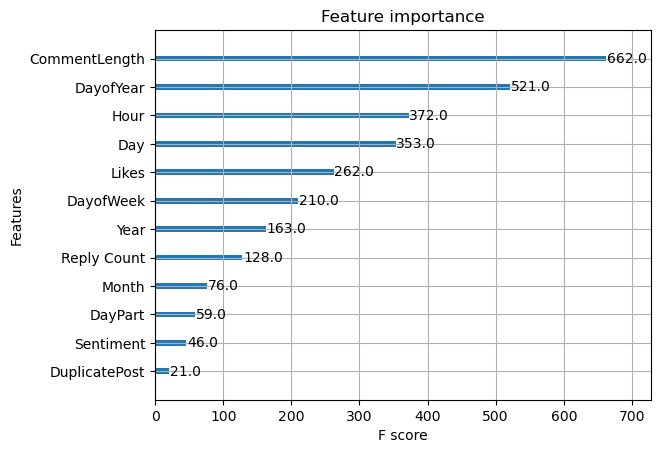

<Figure size 300x400 with 0 Axes>

In [81]:
from xgboost import plot_importance
plot_importance(xgb1)
plt.figure(figsize=(3,4))
plt.show()

## Model Evaluation

In [82]:
Result_Evaluate_A = pd.concat([Result_NBC[0],Result_LR[0],Result_SVC[0],Result_RF[0],Result_XGB[0]],axis=0)
Result_Evaluate_A.round(4)

,CrossVal,Accuracy,F1 Score,ROC-AUC,Time
A1. Naive Bayes,0.8921,0.9005,0.9001,0.8992,0.0030
A2. Logistic Regression,0.9053,0.9046,0.9045,0.9040,0.0094
A3. Support Vector Machine,0.9104,0.9117,0.9116,0.9114,1.2383
A4. Random Forest,0.9015,0.8995,0.8995,0.8999,0.7075
A5. XG Boost,0.8995,0.8904,0.8904,0.8905,1.9413


In [83]:
Result_Evaluate_B = pd.concat([Result_LR_B[0],Result_DT_B[0],Result_RF_B[0],Result_XGB_B[0]],axis=0)
Result_Evaluate_B.round(4)

,CrossVal,Accuracy,F1 Score,ROC-AUC,Time
B1. Logistic Regression,0.7482,0.748,0.7470,0.748,0.0866
B2. Decision Tree,0.7813,0.789,0.7886,0.789,0.0070
B3. Random Forest,0.8372,0.834,0.8340,0.834,0.1960
B4. XG Boost,0.8282,0.832,0.8320,0.832,0.0729


From the ROC-AUC score of each model we can conclude that model A3 using Support Vector Machine algorithm resulted in the best score for spam prediction, with a ROC-AUC and Accuracy score of 0.91. However, it is also one of the most time-consuming models among all.

The second and third best scorers are A2 and A1 models, both giving similarly high accuracy score around 0.90. It is worth noting that A1 model with Naive Bayes Classifier not only gives a high accuracy score, but the training+prediction time are the fastest among all models, significantly less than the SVC model.

By comparing the two modeling approaches we can see that approach A models using NLP prediction generally give higher accuracy score (~0.90) than approach B models using the post attributes (0.7-0.8). This aligns with the expectation that NLP method is more accurate on spam detection, while post attributes may vary from case to case and therefore is less reliable for spam detection. However, in approach B, we were able to identify the most contributing attribute to spam detection from the random forest feature importance, which is the CommentLength with an importance of 0.297.

In [84]:
print(Result_SVC[1])
print(Result_SVC[2])

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       480
           1       0.91      0.92      0.91       505

    accuracy                           0.91       985
   macro avg       0.91      0.91      0.91       985
weighted avg       0.91      0.91      0.91       985

[[432  48]
 [ 39 466]]


In [85]:
print(Result_NBC[1])
print(Result_NBC[2])

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       480
           1       0.87      0.95      0.91       505

    accuracy                           0.90       985
   macro avg       0.91      0.90      0.90       985
weighted avg       0.90      0.90      0.90       985

[[407  73]
 [ 25 480]]


In [86]:
print(Result_LR[1])
print(Result_LR[2])

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       480
           1       0.89      0.93      0.91       505

    accuracy                           0.90       985
   macro avg       0.91      0.90      0.90       985
weighted avg       0.91      0.90      0.90       985

[[423  57]
 [ 37 468]]


The goal of this project is to predict spam comment while minimizing the error on the non-spam items, therefore we want a higher recall on the target class 0-Ham. From the above top 3 scoring models, we can see that the SVC model has the highest recall 0.90 on class 0, so we will pick this model as our final model for spam detection.

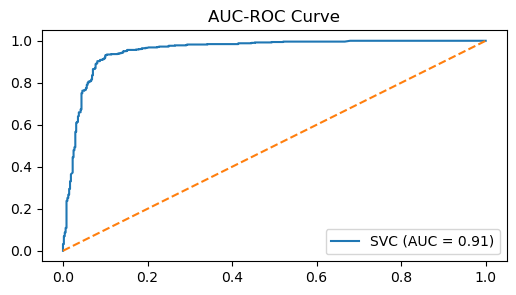

In [97]:
from sklearn.metrics import roc_curve, roc_auc_score
svc = SVC(kernel='rbf', degree=3, C=1, random_state=42, probability=True)
svc.fit(X_train, y_train)
y_prob = svc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = round(roc_auc_score(y_test, svc.predict(X_test)),2)
plt.figure(figsize=(6,3))
plt.plot(fpr, tpr, label=f"SVC (AUC = {auc})")
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='dashed')
plt.title("AUC-ROC Curve")
plt.show()

In [88]:
from sklearn.preprocessing import binarize
from sklearn.metrics import classification_report, confusion_matrix
y_pred_thresh = binarize(y_prob.reshape(-1,1), threshold=0.9)
print(classification_report(y_test, y_pred_thresh))
print(confusion_matrix(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       480
           1       0.95      0.75      0.84       505

    accuracy                           0.85       985
   macro avg       0.86      0.85      0.85       985
weighted avg       0.87      0.85      0.85       985

[[458  22]
 [126 379]]


Threshold for target prediction can be changed from default 0.5 to 0.9 to achieve 0.95 recall score on class 0, meaning 95% of true ham will be correctly classified as ham. However, this method will significantly decrease the recall score on spam class, resulting in more spam slipping through the spam detection, and therefore should be used with consideration.

## Conclusion

In this project, prediction models were built to predict whether comments on YouTube videos were spam or non-spam(ham). Two approaches were taken, prediction based on NLP of comment text and prediction based on the attributes of the comment post. The best model constructed was using support vector machine classifier, resulting in an AUC-ROC and accuracy score of 0.91, and also the highest recall score of 0.90 on class 0-Ham.

In conclusion, the YouTube Comment Spam Detection Project has successfully addressed the pervasive issue of spam comments on the YouTube platform, ensuring a more secure and engaging environment for users and content creators alike. Through the implementation of advanced machine learning and natural language processing techniques, this project has achieved accurate identification and filtration of spam content in real-time. By swiftly detecting and eliminating malicious or irrelevant comments, the project not only enhances user experience by fostering genuine interactions but also bolsters the credibility of the YouTube platform. The developed system's adaptability to evolving spamming techniques ensures a sustainable solution, promising a safer, more authentic, and enjoyable space for the YouTube community.